In [440]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [441]:
#Load and review the dataset
data= pd.read_csv("data/diabetes.csv", sep = ",")

data.info()
data.describe()
column_list = list(data.columns)
print(column_list)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Heat Map

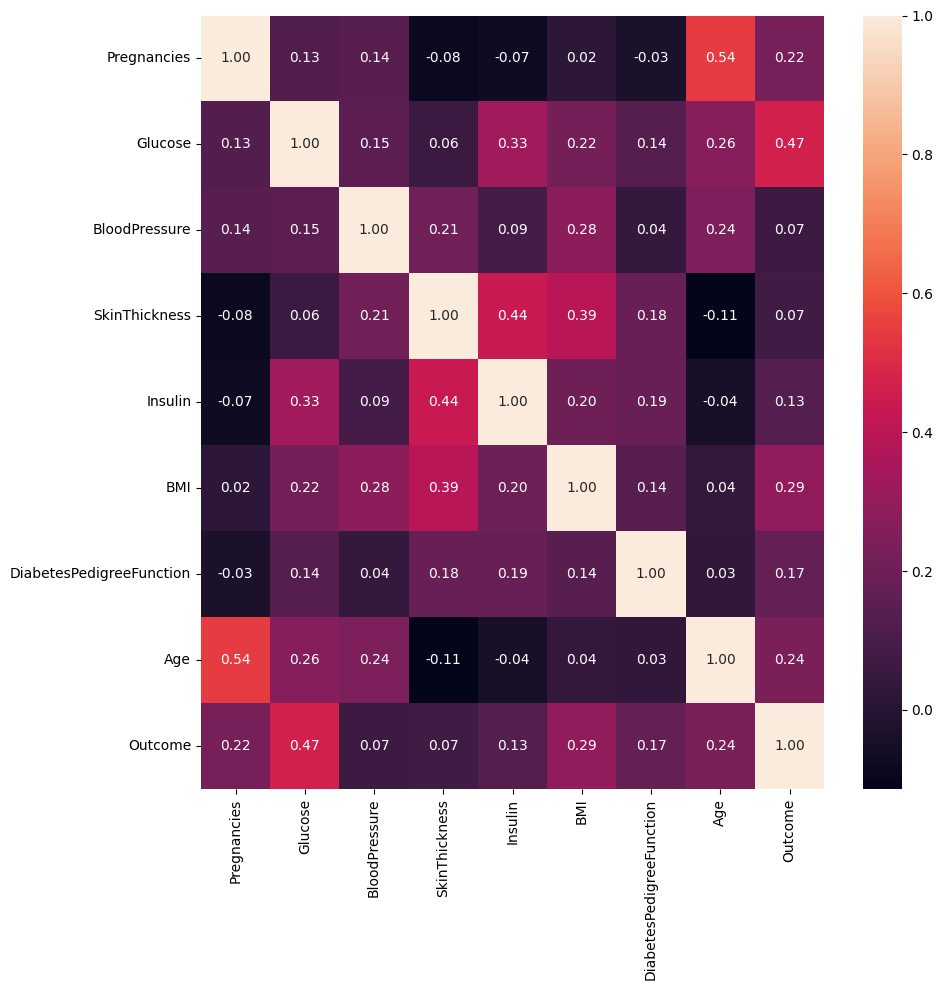

In [442]:
#Analyze - Before Training Model

column_list = data.columns.tolist()

corr_matrix = data[column_list].corr()

sfig, axes = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()


In [443]:
# Heat map shows the Blood Pressure and Skin Thickness are least impactful on the outcome. Let's remove them. 

data = data.drop(columns=["BloodPressure", "SkinThickness"])

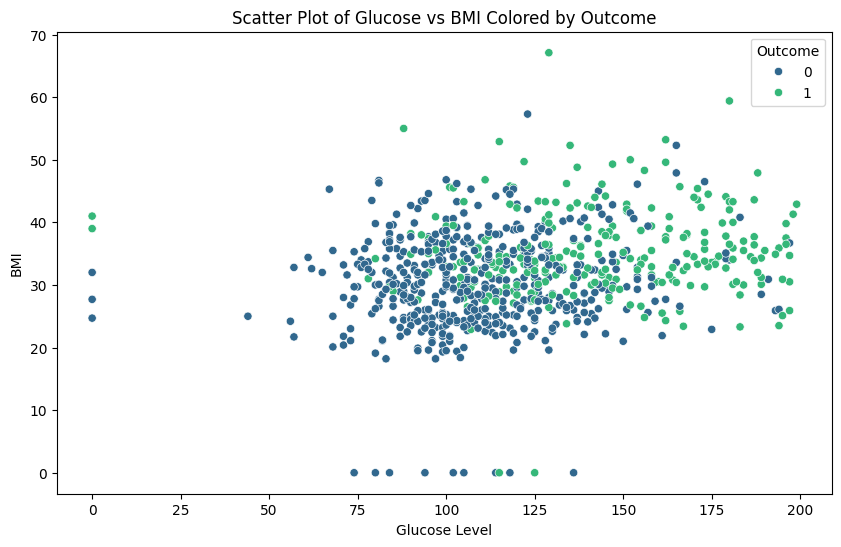

In [444]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', palette='viridis', data=data)

plt.xlabel('Glucose Level')
plt.ylabel('BMI')
plt.title('Scatter Plot of Glucose vs BMI Colored by Outcome')

plt.show()

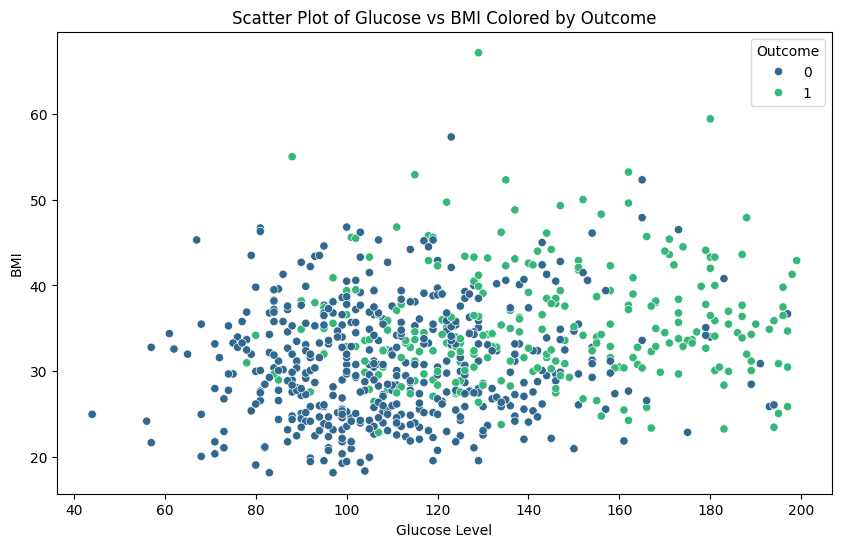

In [446]:
# The most impactful parameter is Glucose Level. It has some outliers with BMI = 0 and Glucose = 0.
# It is impossible to have such body parameters, so they should be removed.
data = data[(data['BMI'] != 0) & (data['Glucose'] != 0)]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', palette='viridis', data=data)

plt.xlabel('Glucose Level')
plt.ylabel('BMI')
plt.title('Scatter Plot of Glucose vs BMI Colored by Outcome')

plt.show()

One hot encode categorical features and scaling - not necessary

In [447]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = data.drop("Outcome", axis = 1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,109.0,120.0,23.1,0.407,26.0
1,0.0,100.0,50.0,30.8,0.597,21.0
2,0.0,180.0,0.0,42.0,1.893,25.0
3,4.0,129.0,270.0,35.1,0.231,23.0
4,2.0,84.0,76.0,30.4,0.968,21.0


In [448]:
X_test_sel.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,173.0,0.0,36.8,0.088,38.0
1,1.0,124.0,0.0,35.8,0.514,21.0
2,7.0,195.0,145.0,25.1,0.163,55.0
3,7.0,83.0,71.0,29.3,0.767,36.0
4,5.0,112.0,0.0,37.8,0.261,41.0


In [449]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("data/train/clean_train.csv", index = False)
X_test_sel.to_csv("data/test/clean_test.csv", index = False)

Decision Tree Model

In [450]:
train_data = pd.read_csv("data/train/clean_train.csv")
test_data = pd.read_csv("data/test/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,109.0,120.0,23.1,0.407,26.0,0
1,0.0,100.0,50.0,30.8,0.597,21.0,0
2,0.0,180.0,0.0,42.0,1.893,25.0,1
3,4.0,129.0,270.0,35.1,0.231,23.0,0
4,2.0,84.0,76.0,30.4,0.968,21.0,0


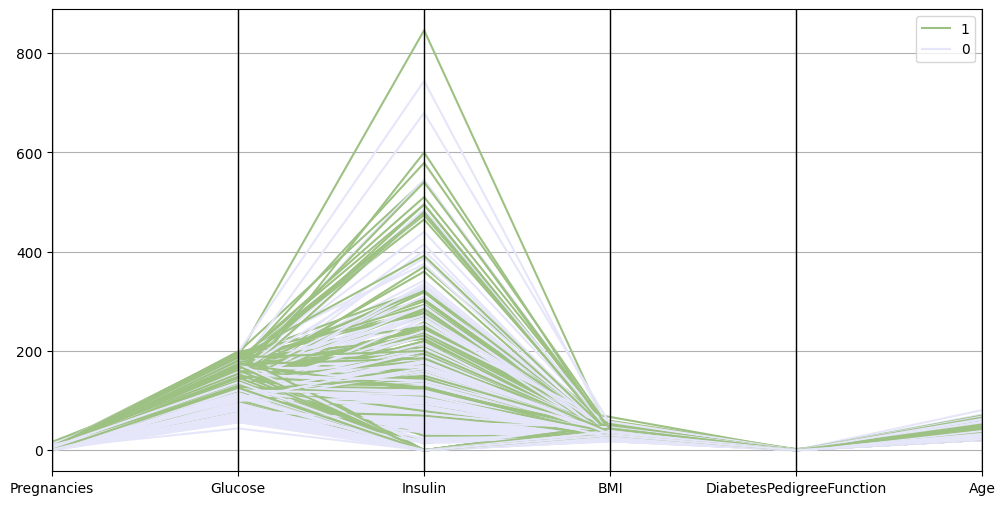

In [451]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(data, "Outcome", color = ("#9DC183", "#E6E6FA", "#FFFFE0"))
plt.show()

In [452]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [453]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

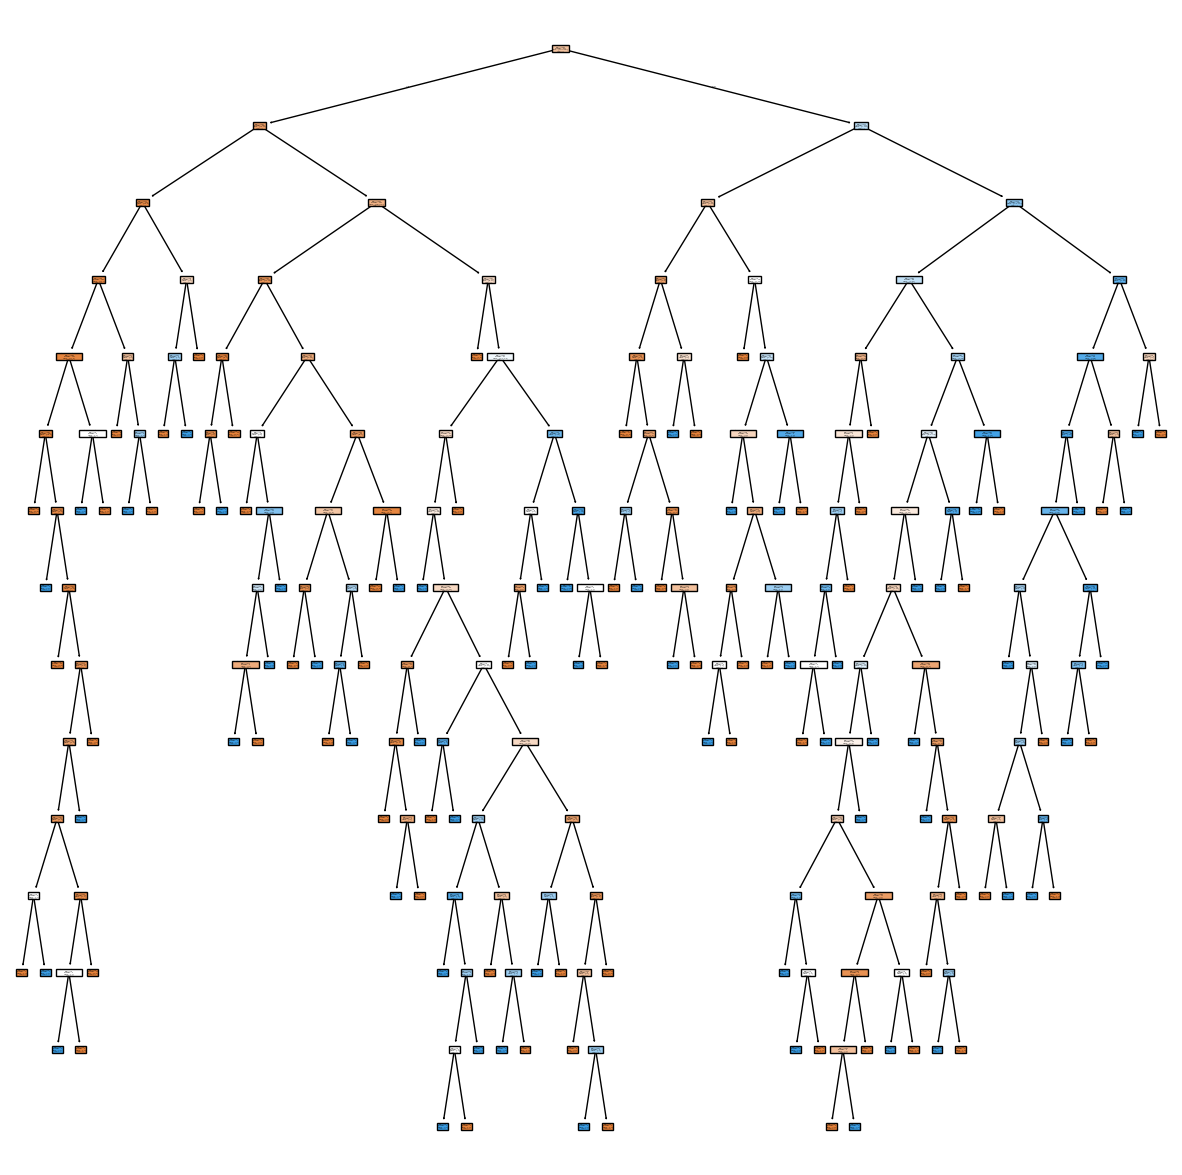

In [454]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
plt.show()

In [457]:
y_pred = model.predict(X_test)
y_pred


array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

In [458]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.77      0.74        91
           1       0.61      0.55      0.58        60

    accuracy                           0.68       151
   macro avg       0.67      0.66      0.66       151
weighted avg       0.68      0.68      0.68       151



Model Optimization

In [459]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10, n_jobs=-1)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [460]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [461]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=42)

In [462]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

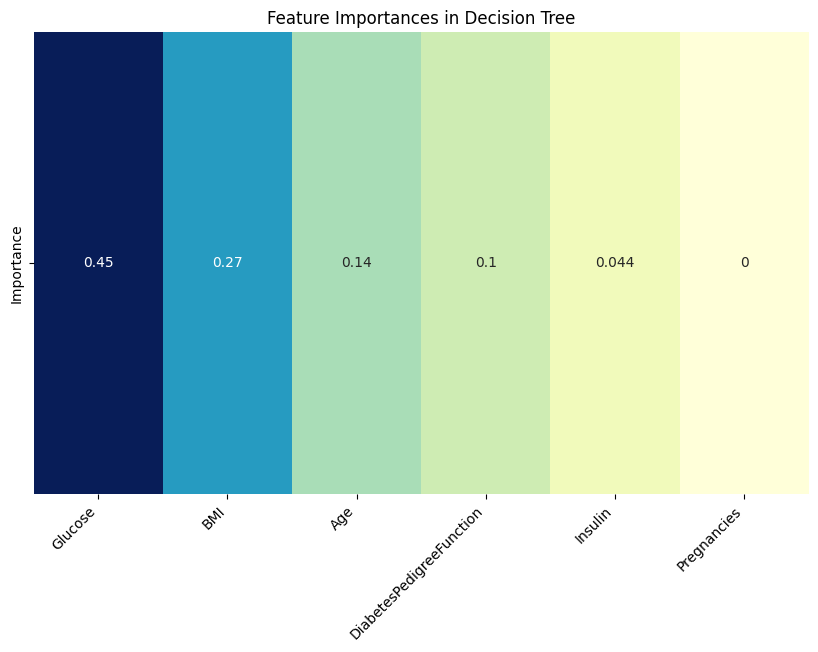

In [463]:
#Heatmap of Feature Importances
from sklearn.tree import DecisionTreeClassifier

feature_importances = model.feature_importances_
feature_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

feature_importances = model.feature_importances_

feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(feature_df[['Importance']].T, annot=True, cmap="YlGnBu", cbar=False, xticklabels=feature_df['Feature'].values)
plt.title("Feature Importances in Decision Tree")
plt.xticks(rotation=45, ha="right")  
plt.show()

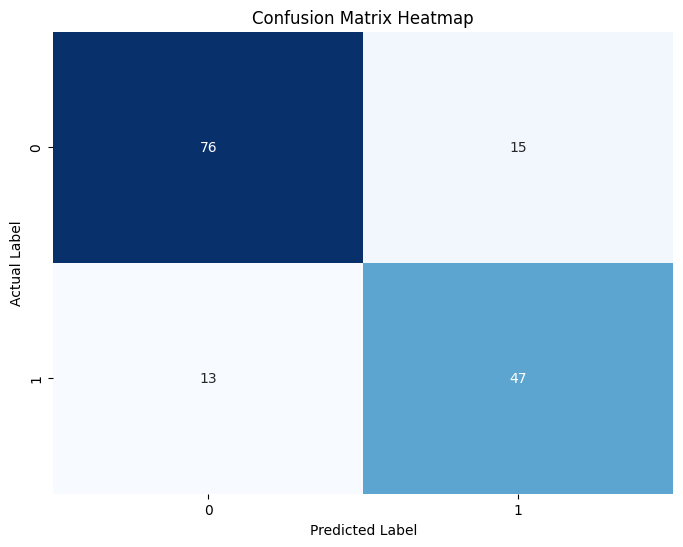

In [464]:
#Confusion Matrix Heatmap -  visualize the model's performance

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [465]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84        91
           1       0.76      0.78      0.77        60

    accuracy                           0.81       151
   macro avg       0.81      0.81      0.81       151
weighted avg       0.82      0.81      0.82       151



In [466]:
from pickle import dump

dump(model, open("models/tree_classifier.sav", "wb"))

In [467]:
# Final accuracy is 81%. Removing outliers made a 4% difference.